In [1]:
import dataloader
import utilities
import features
import matplotlib.pyplot as plt
import matplotlib
import librosa.display
import numpy as np

# load dataset and define path 
dataset = dataloader.Dataloader("beatles","/home/max/ET-TI/Masterarbeit/mirdata/")
PATH = "/home/max/ET-TI/Masterarbeit/latex/figures/"

def compute_otsu_criteria(im, th):
    """Otsu's method to compute criteria."""
    # create the thresholded image
    thresholded_im = np.zeros(im.shape)
    thresholded_im[im >= th] = 1

    # compute weights
    nb_pixels = im.size
    nb_pixels1 = np.count_nonzero(thresholded_im)
    weight1 = nb_pixels1 / nb_pixels
    weight0 = 1 - weight1

    # if one of the classes is empty, eg all pixels are below or above the threshold, that threshold will not be considered
    # in the search for the best threshold
    if weight1 == 0 or weight0 == 0:
        return np.inf

    # find all pixels belonging to each class
    val_pixels1 = im[thresholded_im == 1]
    val_pixels0 = im[thresholded_im == 0]

    # compute variance of these classes
    var1 = np.var(val_pixels1) if len(val_pixels1) > 0 else 0
    var0 = np.var(val_pixels0) if len(val_pixels0) > 0 else 0

    return weight0 * var0 + weight1 * var1

def compute_otsu_thresholds(S):
    """compute thresholds by iterating over a set of thresholds and applying otsu's criteria"""
    threshold_range = np.arange(0,np.max(S),0.01)
    thresholds = np.zeros((S.shape[0],),dtype=float) 
    for i in range(S.shape[0]):
        criterias = [compute_otsu_criteria(S[:,i], th) for th in threshold_range]
        # best threshold is the one minimizing the Otsu criteria
        best_threshold = threshold_range[np.argmin(criterias)]
        thresholds[i] = best_threshold
    return thresholds



(323, 323)
(323, 323)


IndexError: index 0 is out of bounds for axis 0 with size 0

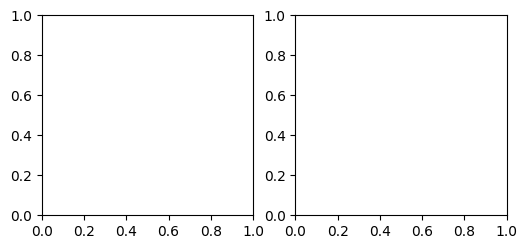

In [9]:
############# Figure Recurrency Plots ###############
SAVE = False

audiopath,annotationspath = dataset["1206"]  # 0607
t, sig = utilities.loadAudio(audiopath, t_start=0,t_stop=60)
t_chroma, chroma = features.crpChroma(sig,hop_length=2048)
annotations = utilities.loadAnnotations(annotationspath)
M = 25
Theta = 50
# create rectangle for zoom
time_interval = (0,45)
zoom_interval = (10,15)
i_0 = np.where(t_chroma >= zoom_interval[0])[0][0]
i_1 = np.where(t_chroma >= zoom_interval[1])[0][0]
S = features.computeSelfSimilarityMatrix(chroma,M=1,inner=True)
S_smoothed = features.computeSelfSimilarityMatrix(chroma,M=M,inner=True)
print(S.shape)
W = features.computeWeightMatrix(chroma,M=M,Theta=Theta)
print(W.shape)
fig,(ax0,ax00)= plt.subplots(1,2,figsize=(6,2.6))
# fig,((ax0,ax00),(ax1,ax11),(ax2,ax22))= plt.subplots(3,2,figsize=(2*3,3*2.6))
img = utilities.plotSSM(ax0,t_chroma,S,time_interval)
ax0.add_artist(matplotlib.patches.Rectangle((i_0,i_0),height=i_1-i_0,width=i_1-i_0,edgecolor="red",facecolor="None"))
fig.colorbar(img,ax=ax0)
img = utilities.plotSSM(ax00,t_chroma,S,zoom_interval)
fig.colorbar(img,ax=ax00)
fig.tight_layout()
if SAVE:
    fig.savefig(PATH+"ssm.png")
fig,(ax1,ax11)= plt.subplots(1,2,figsize=(6,2.6))
img = utilities.plotSSM(ax1,t_chroma,S_smoothed,time_interval)
ax1.add_artist(matplotlib.patches.Rectangle((i_0,i_0),height=i_1-i_0,width=i_1-i_0,edgecolor="red",facecolor="None"))
fig.colorbar(img,ax=ax1)
img = utilities.plotSSM(ax11,t_chroma,S_smoothed,zoom_interval)
fig.colorbar(img,ax=ax11)
fig.tight_layout()
if SAVE:
    fig.savefig(PATH+"ssm_smoothed.png")
fig,(ax2,ax22)= plt.subplots(1,2,figsize=(6,2.6))
img = utilities.plotSSM(ax2,t_chroma,W,time_interval)
ax2.add_artist(matplotlib.patches.Rectangle((i_0,i_0),height=i_1-i_0,width=i_1-i_0,edgecolor="red",facecolor="None"))
fig.colorbar(img,ax=ax2)
img = utilities.plotSSM(ax22,t_chroma,W,zoom_interval)
fig.colorbar(img,ax=ax22)
fig.tight_layout()
if SAVE:
    fig.savefig(PATH+"weight_matrix.png")

In [3]:
audiopath,annotationspath = dataset["0607"]  # 0607
t, sig = utilities.loadAudio(audiopath, t_start=0)
t_chroma, chroma = features.cqtChroma(sig)
t_chroma, chroma_crp = features.crpChroma(sig,hop_length=2048)
annotations = utilities.loadAnnotations(annotationspath)
chroma_smoothed = features.applyPrefilter(sig,t_chroma,chroma_crp,filter_type="rp",M=25,neighbors=50)
chroma_median = features.applyPrefilter(sig,t_chroma,chroma_crp,filter_type="median",N=25)
chroma_beat = features.applyPrefilter(sig,t_chroma,chroma_crp,filter_type="beat_aligned",algorithm="RNN")
   

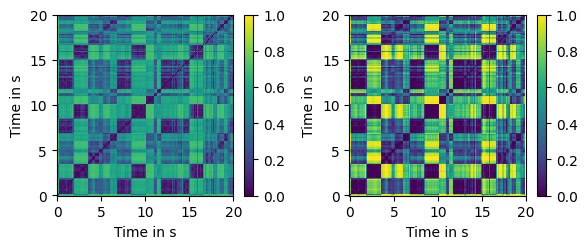

In [18]:
S = features.computeSelfSimilarityMatrix(chroma,M=1,inner=False)
S_inner = 1- features.computeSelfSimilarityMatrix(chroma,M=1,inner=True)
fig,(ax0,ax1) = plt.subplots(1,2,figsize=(6,2.6))
img = utilities.plotSSM(ax0,t_chroma,S,(0,20))
fig.colorbar(img,ax=ax0)
img = utilities.plotSSM(ax1,t_chroma,S_inner,(0,20))
fig.colorbar(img,ax=ax1)
fig.tight_layout()

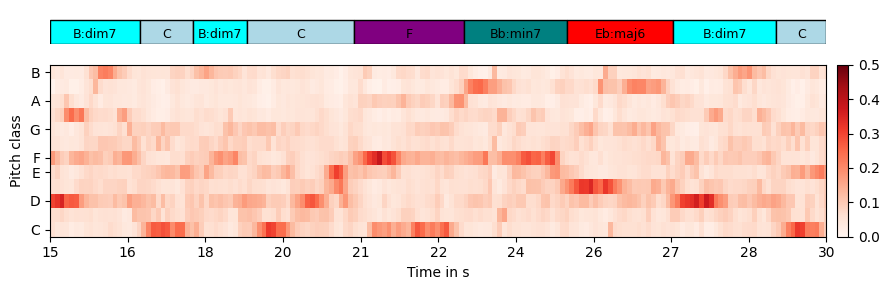

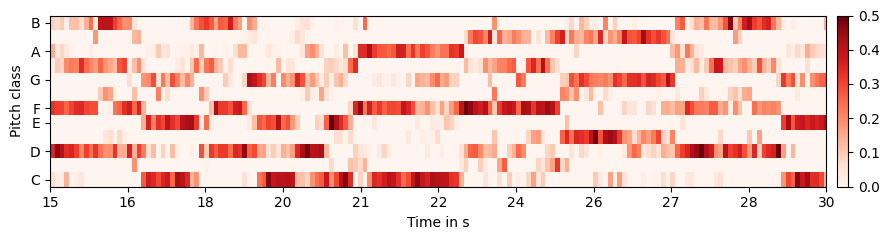

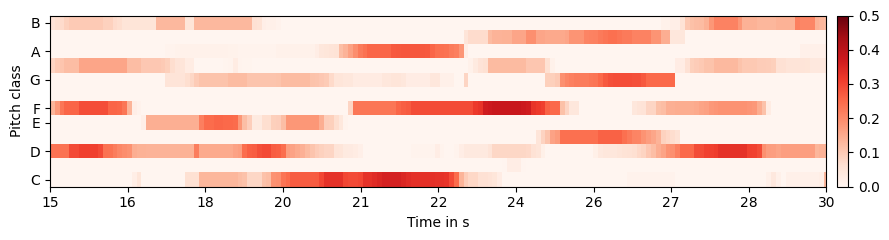

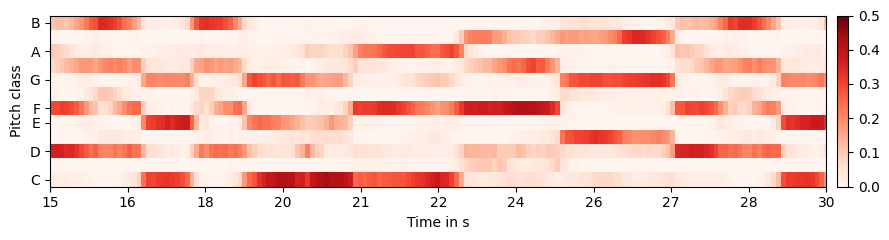

In [4]:
zoom_interval = (15,30)
SAVE = False


fig,((ax0,ax00),(ax1,ax11)) = plt.subplots(2,2,height_ratios=(1,5),width_ratios=(20,.3), figsize=(9,3))
ax00.set_axis_off()
utilities.plotChordAnnotations(ax0,annotations,zoom_interval)

img = utilities.plotChromagram(ax1,t_chroma,chroma,chroma_type="cqt")
fig.colorbar(img,cax=ax11)
ax1.set_xlim(zoom_interval)
fig.tight_layout(w_pad=0.1)

if SAVE:
    fig.savefig(PATH+"prefilter_cqt.png")

fig,(ax0,ax00)= plt.subplots(1,2,width_ratios=(20,.3),figsize=(9,2.5))
img = utilities.plotChromagram(ax0,t_chroma,chroma_crp,chroma_type="cqt")
fig.colorbar(img,cax=ax00)
ax0.set_xlim(zoom_interval)
fig.tight_layout(w_pad=0.1)

if SAVE:
    fig.savefig(PATH+"prefilter_crp.png")
fig,(ax0,ax00)= plt.subplots(1,2,width_ratios=(20,.3),figsize=(9,2.5))
img = utilities.plotChromagram(ax0,t_chroma,chroma_median,chroma_type="cqt")
fig.colorbar(img,cax=ax00)
ax0.set_xlim(zoom_interval)
fig.tight_layout(w_pad=0.1)

if SAVE:
    fig.savefig(PATH+"prefilter_median.png")

fig,(ax0,ax00)= plt.subplots(1,2,width_ratios=(20,.3),figsize=(9,2.5))
img = utilities.plotChromagram(ax0,t_chroma,chroma_smoothed,chroma_type="cqt")
fig.colorbar(img,cax=ax00)
ax0.set_xlim(zoom_interval)
fig.tight_layout(w_pad=0.1)
if SAVE:
    fig.savefig(PATH+"prefilter_rp.png")


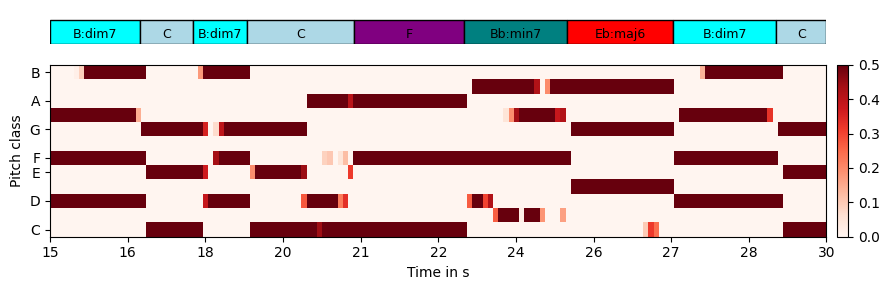

In [22]:

t_dcp,dcp = features.deepChroma(sig,split_nr=1)
#dcp = dcp / np.sum(np.abs(dcp)+np.finfo(float).eps,axis=0) # l1 normalization
fig,((ax0,ax00),(ax1,ax11)) = plt.subplots(2,2,height_ratios=(1,5),width_ratios=(20,.3), figsize=(9,3))
ax00.set_axis_off()
utilities.plotChordAnnotations(ax0,annotations,zoom_interval)

img = utilities.plotChromagram(ax1,t_dcp,dcp,chroma_type="cqt")
fig.colorbar(img,cax=ax11)
ax1.set_xlim(zoom_interval)
fig.tight_layout(w_pad=0.1)
if False:
    fig.savefig(PATH+"deep_chroma.png")